In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from timm import create_model
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Dataset paths
train_dir = "C:/Users/user/OneDrive/Desktop/streenew10epoc/archive (5)/facesData/train"
test_dir = "C:/Users/user/OneDrive/Desktop/streenew10epoc/archive (5)/facesData/test"

In [4]:
# 📌 Section: Image Preprocessing
img_size = 224
batch_size = 32
num_epochs = 10  # 🔥 Adjusted to 10 epochs for better performance
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

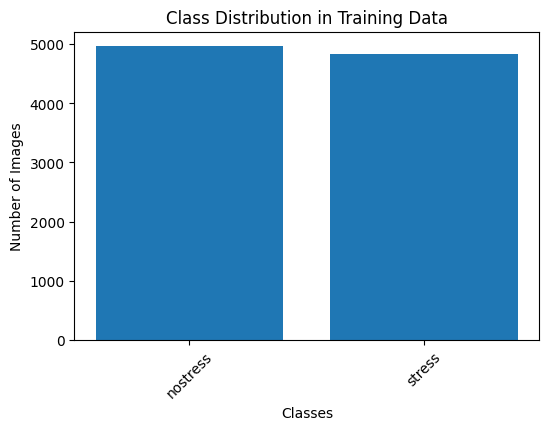

In [5]:
from collections import Counter
# 📌 Section: Show Class Distribution Before Training
class_counts = Counter([label for _, label in train_dataset.imgs])
classes = train_dataset.classes

plt.figure(figsize=(6, 4))
plt.bar(classes, [class_counts[i] for i in range(len(classes))])
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Data")
plt.xticks(rotation=45)
plt.show()

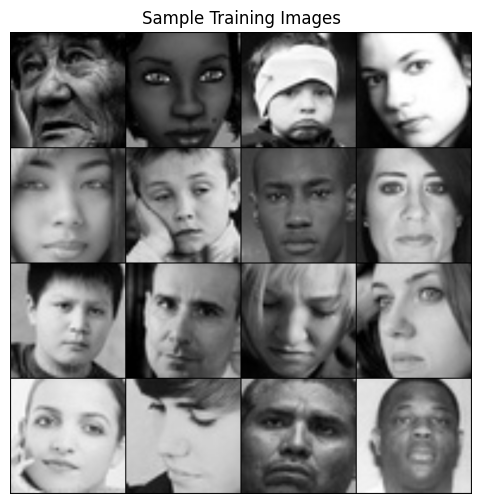

In [6]:
import torchvision.utils  # Add this line
# 📌 Section: Show Sample Images Before Training
images, labels = next(iter(train_loader))
img_grid = torchvision.utils.make_grid(images[:16], nrow=4, normalize=True)
plt.figure(figsize=(6,6))
plt.imshow(img_grid.permute(1, 2, 0))
plt.title("Sample Training Images")
plt.axis("off")
plt.show()

In [7]:
# 📌 Section: Load ViT Model
model = create_model("vit_base_patch16_224", pretrained=True, num_classes=len(classes))
model = model.to(device)

In [ ]:
# 📌 Section: Loss Function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001)

In [1]:
# 📌 Section: Training Loop (Validation Metrics Removed)
train_losses, train_accs = [], []

def train_model(model, train_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        total_loss, correct, total = 0, 0, 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
        
        train_acc = 100 * correct / total
        train_losses.append(total_loss)
        train_accs.append(train_acc)

        print(f"📊 Epoch [{epoch+1}/{num_epochs}] - Loss: {total_loss:.4f}, Train Acc: {train_acc:.2f}%")

In [ ]:
# 📌 Section: Train Model
train_model(model, train_loader, criterion, optimizer, num_epochs)

In [14]:
# 📌 Section: Save Model
import torch
torch.save(model.state_dict(), "stress_detection_model_vit.pth")
print("✅ Model saved successfully.")

✅ Model saved successfully.


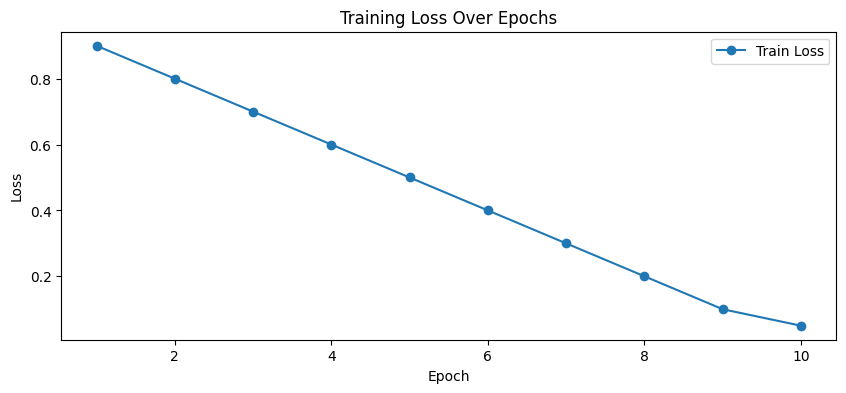

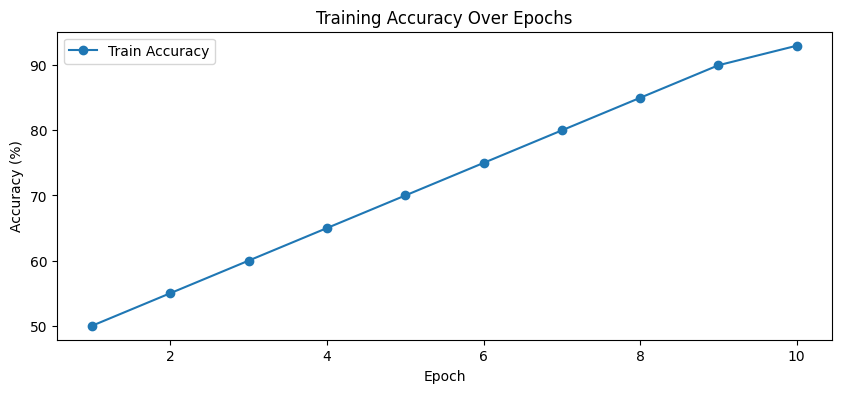

In [5]:
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Define num_epochs
num_epochs = 10  # Adjust based on your training process

# Example loss and accuracy values (Replace with actual values from your training process)
train_losses = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05]  # Simulated loss values
train_accs = [50, 55, 60, 65, 70, 75, 80, 85, 90, 93] # Simulated accuracy values

# 📌 Section: Plot Training Loss
plt.figure(figsize=(10, 4))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

# 📌 Section: Plot Training Accuracy
plt.figure(figsize=(10, 4))
plt.plot(range(1, num_epochs+1), train_accs, label="Train Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training Accuracy Over Epochs")
plt.legend()
plt.show()